| Column Name                          | Description                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------|
| DBN                                 | District Borough Number, a unique code identifying each school (e.g., 01M364) |
| Boro                                | Borough Code                                                               |
| BN                                  | Borough Number                                                             |
| Building Code                       | Code for the building the school is located in (not always same as DBN)   |
| School_Phone_Number                 | Contact number for the school                                              |
| Fax_Number                          | Fax number                                                                 |
| Printed_Name                        | School's printed display name                                              |
| Alphabetic_Name_Long                | Alternate formatting of name (e.g., "Facing History School, The")         |
| grade span 2014-2015 min            | Minimum grade offered during 2014-2015 (e.g., 0K = Kindergarten)           |
| grade span 2014-2015 max            | Maximum grade offered during 2014-2015                                     |
| Expected grade span min             | Expected minimum grade                                                     |
| Expected grade span max             | Expected maximum grade                                                     |
| Last Year BUS?                      | If 1, bus routes are from the prior year's analysis                        |
| BUS                                 | Available bus routes                                                       |
| Last Year SUBWAY?                   | If 1, subway access is from prior year's analysis                          |
| SUBWAY                              | Available subway lines                                                     |
| Primary_Address_Line_1              | Street address                                                             |
| City                                | City or borough (e.g., "New York" for Manhattan)                          |
| State_Code                          | NY (New York)                                                              |
| Zip                                 | ZIP Code                                                                   |
| Total Student 10/26                 | Number of students enrolled as of October 26                              |
| Campus_Name                         | Name of the campus                                                         |
| ELL Data                            | English Language Learners data                                             |
| School_Accessibility_Description    | Indicates if the school is fully, partially, or not accessible             |
| First Priority01 – Tenth Priority10| Admission priorities by rank                                               |
| progcount                           | Number of programs offered                                                 |
| Email                               | School's email contact                                                     |
| Independent Website                 | Official website URL                                                       |
| School_Type                         | Type of institution (e.g., public, charter)                                |
| Overview Paragraph                  | Summary description of the school                                          |
| Program Highlights                  | Notable features or offerings                                              |
| Language Classes                    | Foreign languages offered                                                  |
| Advanced Placement Courses          | AP classes available                                                       |
| PSAL Sports - Boys/Girls/Co-ed      | School sports offered by gender                                            |
| School Sports                       | General list of school sports                                              |
| Start Time / End Time               | School's operating hours                                                   |
| SE_Services                         | Special education services                                                 |
| Online AP/Language Courses          | Online courses availability                                                |
| Neighborhood, Districts, Latitude, Longitude | External geographic fields from Ontodia                    |
| @context / @type / @id              | Metadata fields (Ontodia context)                                          |


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#school-safety-repor.csv
csv_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQda9c72vgLVKozxPIUXgT2AJ31ze8zsyEHUyjs0hYTY525GfUOihDabkd4A4t2ETSnAR07CyiiUA95/pub?gid=1014354530&single=true&output=csv"

In [46]:
data = pd.read_csv (csv_path)
data.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

# Clean the column names

In [47]:
'''
- Make all lowercase
- Replace spaces with underscores (_)
- Remove special characters
'''
import re

# Clean column names
data.columns = [
    re.sub(r'\W+', '_', col.lower().strip())
    for col in data.columns
]
data.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

# Explore the dataset

In [48]:
print (data.shape)

(435, 69)


In [49]:
data['borough'].value_counts()

,count
borough,
Brooklyn,121
Bronx,118
Manhattan,106
Queens,80
Staten Island,10


Filter the dataset to include only schools located in Brooklyn

In [50]:
#How many total schools are in Brooklyn?
brooklyn_data = data[data['borough'] == 'Brooklyn']
brooklyn_data['borough'].count()

np.int64(121)

In [51]:
#How many offer Grade 9 entry in Brooklyn?
brooklyn_data[brooklyn_data['grade_span_min'] == 9]['grade_span_min'].count()

np.int64(98)

In [52]:
#How many offer Grade 9 entry?
data[data['grade_span_min'] == 9]['grade_span_min'].count()

np.int64(351)

In [53]:
#Count of schools per borough
data['borough'].value_counts()

,count
borough,
Brooklyn,121
Bronx,118
Manhattan,106
Queens,80
Staten Island,10


In [54]:
#Average number of students per borough
data.groupby('borough')['total_students'].mean().round(0).astype(int).sort_values(ascending=False).rename('average_number_of_students')

,average_number_of_students
borough,
Staten Island,1848
Queens,1047
Brooklyn,699
Manhattan,590
Bronx,490


In [55]:
#Summary of grade_span_max grouped by borough
data.groupby('borough')['grade_span_max'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


# Viz

<Axes: xlabel='borough'>

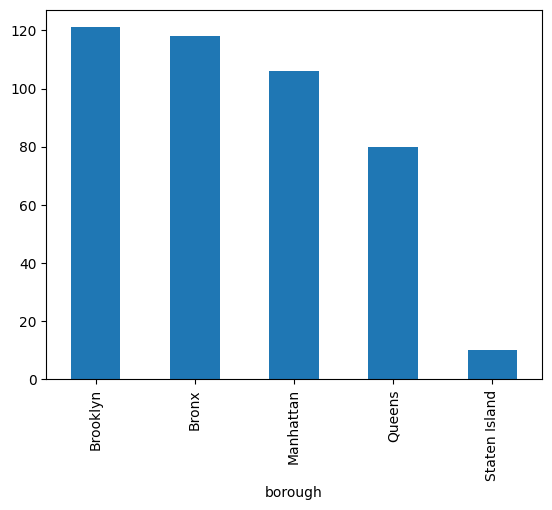

In [56]:
#Bar chart: Number of schools per borough
data['borough'].value_counts().plot(kind='bar')

# Key Insights

# **Staten Island has the least number of schools from area perspective**

In [57]:
import ast  # safely parse strings into dicts

# Convert stringified dict to actual dict
data['location'] = data['location_1'].apply(ast.literal_eval)

# Extract latitude and longitude
data['latitude'] = data['location'].apply(lambda x: float(x['latitude']))
data['longitude'] = data['location'].apply(lambda x: float(x['longitude']))


In [58]:
data['borough'].value_counts()

,count
borough,
Brooklyn,121
Bronx,118
Manhattan,106
Queens,80
Staten Island,10


In [59]:
import folium

# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

borough_colors = {
    'Bronx': 'red',
    'Brooklyn': 'blue',
    'Manhattan': 'green',
    'Queens': 'purple',
    'Staten Island': 'orange'
}

# Add markers for each school
for _, row in data.iterrows():
    borough = row['borough']
    color = borough_colors.get(borough, 'gray')
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['school_name']}, {row['borough']}",
        icon=folium.Icon(color=color)
    ).add_to(nyc_map)

nyc_map


# **Spanish is taught disproportionately more than other languages — nearly twice as often as French, the second most commonly offered language.**

<Axes: ylabel='language'>

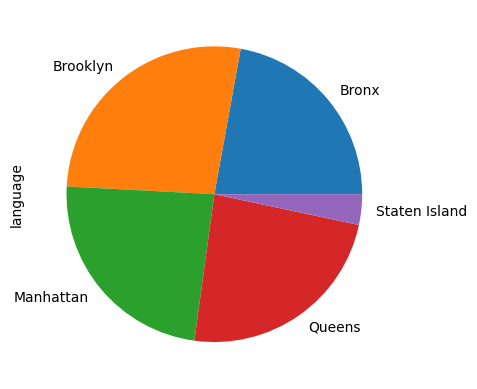

In [60]:
borough_classes = []
for _ ,row in data.iterrows():
  brough = row['borough']
  classes_in_row = str(row['language_classes']).split(',')
  #borough_classes.extend(classes_in_row)
  for language in classes_in_row:
    language = language.strip()
    borough_classes.append((brough, language))

langdf = pd.DataFrame(borough_classes, columns=['borough', 'language'])
langdf.groupby('borough')['language'].count().plot(kind="pie")

<Axes: xlabel='language'>

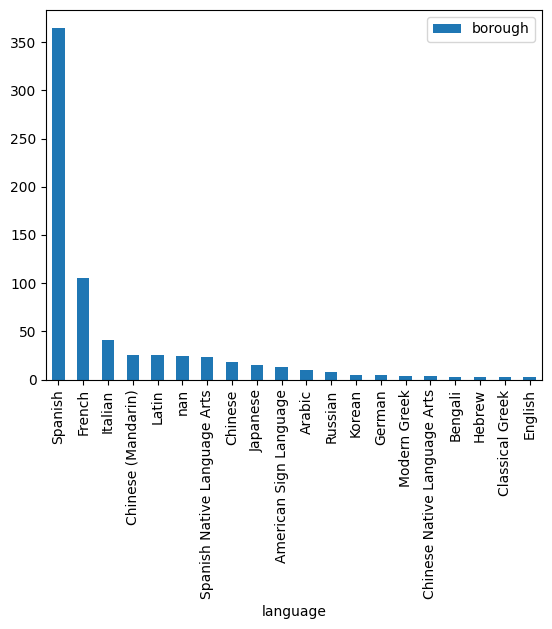

In [61]:
langdf_clean = langdf[langdf['language'].notna()]
langdf_clean = langdf_clean[langdf_clean['language'].str.strip() != '']
lang_group = langdf_clean.groupby('language').count()
lang_group_filtered = lang_group[lang_group['borough'] > 2]
lang_group_filtered.sort_values(by='borough', ascending=False).plot(kind='bar')


# **Number of available busses in Staten Island are seriously low as compared to its geographical area**

<Axes: xlabel='borough'>

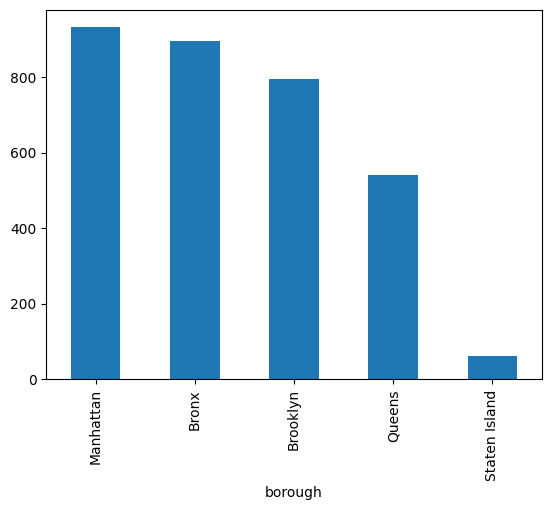

In [62]:
busses_in_borough = []

for _, row in data.iterrows():
  if (row['bus'] == 'N/A'):
    continue
  busses = str(row['bus']).split(',')
  for bus in busses:
    bus = bus.strip()
    busses_in_borough.append((row['borough'], bus))

busdf = pd.DataFrame(busses_in_borough, columns=['borough', 'bus'])
busdf.groupby('borough')['bus'].count().sort_values(ascending=False).plot(kind='bar')

# **Due to a lower number of schools relative to the needs of Staten Island, the average number of students per school are very high — nearly twice that of Queens, which has the second-highest average.**

In [63]:
schools_per_borough = data['borough'].value_counts().sort_index()
students_per_borough = data.groupby('borough')['total_students'].sum().sort_index()
comparison_df = pd.DataFrame({
    'Number of Schools': schools_per_borough,
    'Total Students': students_per_borough
})


comparison_df['Avg Students per School'] = (comparison_df['Total Students'] / comparison_df['Number of Schools']).round(0).astype(int)
comparison_df.sort_values(by='Avg Students per School', ascending=False)

,Number of Schools,Total Students,Avg Students per School
borough,,,
Staten Island,10,18475.0,1848
Queens,80,79545.0,994
Brooklyn,121,83197.0,688
Manhattan,106,60752.0,573
Bronx,118,57868.0,490


In [64]:
comparison_df.describe()

,Number of Schools,Total Students,Avg Students per School
count,5.000000,5.000000,5.000000
mean,87.000000,59967.400000,918.600000
std,45.978256,25736.836797,553.575469
min,10.000000,18475.000000,490.000000
25%,80.000000,57868.000000,573.000000
50%,106.000000,60752.000000,688.000000
75%,118.000000,79545.000000,994.000000
max,121.000000,83197.000000,1848.000000
